**Author: Shehab**

# Importing Packages

In [ ]:
#Importing necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

from wordcloud import WordCloud,ImageColorGenerator

##machine learning and deep learning packages
!pip install tensorflow
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from tensorflow.keras.preprocessing.text import Tokenizer

from sklearn.feature_extraction.text import CountVectorizer

import tensorflow as tf
from keras.layers import Flatten


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Exploring the dataset

In [ ]:
#tripadvisor_df = pd.read_csv('/content/drive/MyDrive/NEOMA/Machine learning/Individual Project/tripadvisor_hotel_reviews.csv')
tripadvisor_df = pd.read_csv('/content/tripadvisor_hotel_reviews.csv')
tripadvisor_df

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5
...,...,...
20486,"best kept secret 3rd time staying charm, not 5...",5
20487,great location price view hotel great quick pl...,4
20488,"ok just looks nice modern outside, desk staff ...",2
20489,hotel theft ruined vacation hotel opened sept ...,1


In [ ]:
#If missing data
tripadvisor_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20491 entries, 0 to 20490
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  20491 non-null  object
 1   Rating  20491 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 320.3+ KB


Text(0.5, 1.0, 'Reviews per Rating')

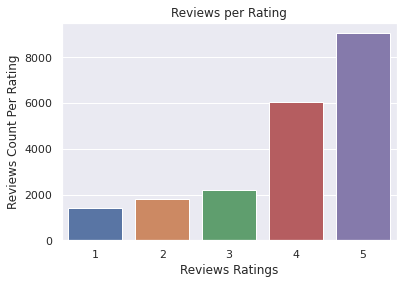

In [ ]:
sns.set(style="darkgrid")
ax = sns.countplot(x="Rating", data=tripadvisor_df)
ax.set_xlabel('Reviews Ratings')
ax.set_ylabel('Reviews Count Per Rating')
ax.set_title("Reviews per Rating")

Text(0.5, 1.0, 'Word Count Boxplot')

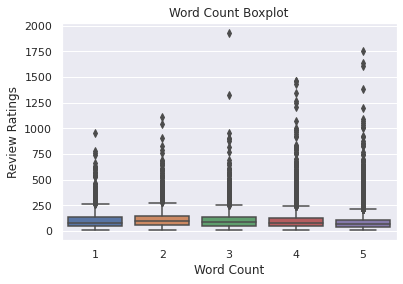

In [ ]:
#Checking the words count per review
tripadvisor_df['Word_count']= tripadvisor_df['Review'].map(lambda x: len(x.split()))
ax = sns.boxplot(x = 'Rating', y='Word_count', data=tripadvisor_df)
ax.set_xlabel('Word Count')
ax.set_ylabel('Review Ratings')
ax.set_title("Word Count Boxplot")


Larger outliers for higher ratings ( 4 & 5)

# Data Pre-processing & Preparation

## Cleaning the review

In [ ]:
print(string.punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [ ]:
def str_clean(review):
  cleaned_review = review.translate(str.maketrans('', '', string.punctuation))
  return cleaned_review

In [ ]:
tripadvisor_df['Review'] = tripadvisor_df['Review'].apply(str_clean)
tripadvisor_df = tripadvisor_df[['Review', 'Rating']]
tripadvisor_df

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4 experience hotel monaco seatt...,3
3,unique great stay wonderful time hotel monaco ...,5
4,great stay great stay went seahawk game awesom...,5
...,...,...
20486,best kept secret 3rd time staying charm not 5s...,5
20487,great location price view hotel great quick pl...,4
20488,ok just looks nice modern outside desk staff n...,2
20489,hotel theft ruined vacation hotel opened sept ...,1


## Removing Stop words:

Stop words are common used words in a language such as articles, prepositions and pronouns. These words do not help much while Natural Language Processing (NLP). For example, in English, 'the, in, what' are stop words.

In [ ]:
English_stop_words = stopwords.words('english')
print(English_stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [ ]:
def removing_stop_words(review):
  words = [word for word in review.split() if word.lower() not in English_stop_words]
  new_review = " ".join(words)
  return new_review

test = "i like our home"
print(removing_stop_words(test))

like home


In [ ]:
tripadvisor_df['Review'] = tripadvisor_df['Review'].apply(removing_stop_words)
tripadvisor_df['Review']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


0        nice hotel expensive parking got good deal sta...
1        ok nothing special charge diamond member hilto...
2        nice rooms 4 experience hotel monaco seattle g...
3        unique great stay wonderful time hotel monaco ...
4        great stay great stay went seahawk game awesom...
                               ...                        
20486    best kept secret 3rd time staying charm 5star ...
20487    great location price view hotel great quick pl...
20488    ok looks nice modern outside desk staff nt par...
20489    hotel theft ruined vacation hotel opened sept ...
20490    people talking ca nt believe excellent ratings...
Name: Review, Length: 20491, dtype: object

# Tokenizing Reviews & Transferring Sequences

In [ ]:
reviews_to_tokenize = tripadvisor_df['Review'].copy() 

print("Example of a senctence before tokenizing: ") 
print(reviews_to_tokenize[5])

token = Tokenizer() 
token.fit_on_texts(reviews_to_tokenize) 
texts = token.texts_to_sequences(reviews_to_tokenize) 

print("Review transferred into Sequence: ")
print(texts[5])

#pad_sequence is used in order to have the same length for all reviews
texts = pad_sequences(texts, padding='post') 


print("After Padding the sequence: ")
print(texts[5])

Example of a senctence before tokenizing: 
love monaco staff husband stayed hotel crazy weekend attending memorial service best friend husband celebrating 12th wedding anniversary talk mixed emotions booked suite hotel monte carlos loaned beautiful fantanned goldfish named joliet weekend visited dogs worked desk human companions room decorated nicely couch used pillows loccitane bath amenities welcome sight room quiet peaceful wireless internet access wonderful server went morning leaving problems printing boarding passes afternoon reception serves oenophilesatisfying wine australia scrumptious cookies restaurant closed renovation stay finally ate food good drinks better word caution restaurant larger person sit booths wo nt fit 56 125 lbs husband 59 175 table smackagainst stomach couple inches space mighty uncomfortable patron larger pregnant bad design opinion place decorated funky welcoming way metal wood handblown glass light fixtures expect seattle capital glass art industry defin

In [ ]:
#number_unique_words = texts.flatten()
#number_unique_words = len(np.unique(number_unique_words))+1
#print(number_unique_words)
number_unique_words= len(token.word_index) + 1
number_unique_words

81409

In [ ]:
#Looking back at dataset
tripadvisor_df.head(2)

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2


#Splitting Data

Data splitting into 80% train & 20% test

Data will be shuffled because data sequence not important and better to be shuffled & random states equals 1 to have the same data splitting across different machines

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(texts, tripadvisor_df['Rating'], train_size=0.7, shuffle=True, random_state=1)

#scaling using standardscaler
print(f"The shape for the X train is {x_train.shape[0]} and X test {x_test.shape[0]}")

The shape for the X train is 14343 and X test 6148


# Machine Learning & Deep Learning Models

## Support Vector Machine (SVM)

In SVM, we take the output of the linear function and if that output is greater than 1, we identify it with one class and if the output is -1, we identify is with another class. SVM works with classification problem while Support Vector Regression (SVR) works with continuous values. However, we can implement multiclass classfication using SVM. For multiclass classification, the same principle is utilized after breaking down the multiclassification problem into multiple binary classification problems. I will implement the one-to-many approach in our case so each hyperplane aims to separate between a class and all others at once. Due to computational power and time processing, we will transfore the Y variable to a binary dependent variable of 1 & 0 and run binary SVM.


In [ ]:
def binary_rating(rating):
    if rating == 5 or rating == 4: 
        #positive ratings
        return 1 
    else: 
        return 0 
tripadvisor_df['binary_rating'] = tripadvisor_df['Rating'].apply(binary_rating)
x_train_binary, x_test_binary, y_train_binary, y_test_binary = train_test_split(texts, tripadvisor_df['binary_rating'], train_size=0.7, shuffle=True, random_state=1)
#Scaling data between [-1, 1] to increase speed
scaling = MinMaxScaler(feature_range=(-1,1)).fit(x_train_binary)
x_train_binary = scaling.transform(x_train_binary)
x_test_binary = scaling.transform(x_test_binary)
texts_binary_transformed = scaling.transform(texts)


In [ ]:
linear = SVC(kernel='linear').fit(x_train_binary, y_train_binary)
linear_predictions = linear.predict(x_test_binary)

### Classifications reports for Linear binary SVM

In [ ]:
print("Classification report for Linear Multi SVM")
print(classification_report(y_test_binary,linear_predictions))

Classification report for Linear Multi SVM
              precision    recall  f1-score   support

           0       0.35      0.02      0.03      1600
           1       0.74      0.99      0.85      4548

    accuracy                           0.74      6148
   macro avg       0.54      0.50      0.44      6148
weighted avg       0.64      0.74      0.63      6148



Precision and recall are higher for positive ratings. Model is stronger to predict positive reviews. The dataset is not well balanced more of support for 1 over 0. The overall precision of the model is 0.54 and 0.64 using macro avg and wieghted avg respectively. The accuracy of the model is 74% but it is not very useful here since the model is imbalanced.

### Five Fold Cross Validation SVM

The method is built on the logic that the data is splitted into K sub-sets (K=5 in our case). The holdout strategy is repeated K=5 times. At each time, one sub-set is used as the test (validation) set, while the other remanining K-1 (4 in our case) are put together to form the training data set.


In [ ]:
model = SVC(kernel='linear')
scores = cross_val_score(model, texts_binary_transformed, tripadvisor_df['binary_rating'], cv=5)
print("Accuracy: %0.2f (+- %0.2f)"%(scores.mean(), scores.std()*2))

## Random Forest Classifier

The number of trees in the sample is fixed to 10, using Gini criterion, random state set to 0

In [ ]:
random_forest_classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
random_forest_classifier.fit(x_train_binary, y_train_binary)
randomforest_predictions = random_forest_classifier.predict(x_test_binary)

### Classifications reports for Random Forest Classifier


In [ ]:
print("Classification report for Random Forest Classifier")
print(classification_report(y_test_binary,randomforest_predictions))

Classification report for Random Forest Classifier
              precision    recall  f1-score   support

           0       0.35      0.17      0.23      1600
           1       0.75      0.89      0.82      4548

    accuracy                           0.70      6148
   macro avg       0.55      0.53      0.52      6148
weighted avg       0.65      0.70      0.66      6148



Precision and recall are higher for positive ratings. Model is stronger to predict positive reviews. The dataset is not well balanced more of support for 1 over 0. The model performs better than SVM. F-1 score is better for 0 class. The precision is also slightly higher.

### Five Fold Cross Validation Random Forest Classifier

In [ ]:
model = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
scores = cross_val_score(model, texts_binary_transformed,tripadvisor_df['binary_rating'], cv=5)
print("Accuracy: %0.2f (+- %0.2f)"%(scores.mean(), scores.std()*2))

Accuracy: 0.70 (+- 0.01)


## Multi-Layer Neural Networks

In [ ]:
inputs = tf.keras.Input(shape=(x_train.shape[1],))
x = tf.keras.layers.Embedding(
    input_dim=number_unique_words,
    output_dim=60
)(inputs)

#bring x to one vector dimension
x = tf.keras.layers.Flatten()(x)

#Two layers network
x = tf.keras.layers.Dense(128, activation='relu')(x)
x = tf.keras.layers.Dense(128, activation='relu')(x)

#single output for the predictions
outputs = tf.keras.layers.Dense(1, activation='linear')(x)

#creating the model
model = tf.keras.Model(inputs=inputs, outputs=outputs)


#compiling the model using adm optimizer
model.compile(
    optimizer = 'adam',
    loss='mse'

)

history = model.fit(
    x_train,
    y_train,
    validation_split = 0.2,
    batch_size=32,
    epochs=100,
    callbacks=[
               tf.keras.callbacks.EarlyStopping(
                   monitor='val_loss',
                   patience=3,
                   restore_best_weights=True
               )
    ]
)


Epoch 1/100
359/359 [==============================] - 150s 270ms/step - loss: 1.1237 - val_loss: 0.5450
Epoch 2/100
359/359 [==============================] - 96s 266ms/step - loss: 0.3048 - val_loss: 0.5591
Epoch 3/100
359/359 [==============================] - 95s 265ms/step - loss: 0.1231 - val_loss: 0.5279
Epoch 4/100
359/359 [==============================] - 99s 277ms/step - loss: 0.0785 - val_loss: 0.5111
Epoch 5/100
359/359 [==============================] - 96s 268ms/step - loss: 0.0555 - val_loss: 0.5112
Epoch 6/100
359/359 [==============================] - 97s 269ms/step - loss: 0.0483 - val_loss: 0.5650
Epoch 7/100
359/359 [==============================] - 94s 262ms/step - loss: 0.0473 - val_loss: 0.5139


In [ ]:
model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 1887)]            0         
                                                                 
 embedding_5 (Embedding)     (None, 1887, 60)          4884540   
                                                                 
 flatten_4 (Flatten)         (None, 113220)            0         
                                                                 
 dense_9 (Dense)             (None, 128)               14492288  
                                                                 
 dense_10 (Dense)            (None, 128)               16512     
                                                                 
 dense_11 (Dense)            (None, 1)                 129       
                                                                 
Total params: 19,393,469
Trainable params: 19,393,469
Non-t

In [ ]:
history.history

{'loss': [1.1236733198165894,
  0.30476534366607666,
  0.12309014052152634,
  0.07849626988172531,
  0.05548780784010887,
  0.04825960472226143,
  0.047331660985946655],
 'val_loss': [0.5450080633163452,
  0.5590682625770569,
  0.5278804302215576,
  0.5111194849014282,
  0.5112082362174988,
  0.5649515390396118,
  0.5139200687408447]}

### Deep Learning Model Results

In [ ]:
print("Evaluate model on test data")
results = model.evaluate(x_test, y_test, batch_size=32)
print("test loss", results)

# Generate a prediction using model.predict() 
# and calculate it's shape:
print("Generate a prediction")
y_predictions = model.predict(x_test)
print("prediction shape:", y_predictions.shape)

Evaluate model on test data
193/193 [==============================] - 6s 29ms/step - loss: 0.4966
test loss 0.4966104328632355
Generate a prediction
prediction shape: (6148, 1)


In [ ]:
y_predictions = np.squeeze(y_predictions)
rmse = np.sqrt(np.mean((y_test - y_predictions)**2))
R_square = 1 - (np.sum((y_test - y_predictions)**2)/np.sum((y_test - y_test.mean())**2))

print("RMSE: {:.2f}".format(rmse))
print("R square value is {:.3f}".format(R_square))
#RMSE means how fare are we in point rating from the correct rating
#R square for the goodness of the model

RMSE: 0.70
R square value is 0.674


The RMSE tells use that for a given review text analysis, the rating predictions could be +- 0.70 from the actual rating of the review. The R squre value tells us that our model is 67% better than a simpl y_test - y_test mean model.

**testing on new reviews**

In [ ]:
def review_rating_generator(sentence: "a list of words separated by comma"):
    coded_sentence=[]
    for word, code in token.word_index.items():
      if word in sentence:
        coded_sentence.append(code)

    arr = np.array(coded_sentence)
    arr = np.append(arr,[0]*(len(texts[0])-len(coded_sentence)))
    arr.resize(1,len(arr))
    predicted_rating = model.predict(arr).item()
    return predicted_rating
    

In [ ]:
review_rating_generator(['employees', 'are', 'nice', 'but', 'very', 'expensive'])

3.6376547813415527

In [ ]:
review_rating_generator(['horrible', 'dirty', 'shower'])

2.524749279022217

In [ ]:
review_rating_generator(['sunny', 'room', 'quite', 'and', 'nice', 'view'])

3.9415478706359863

In [ ]:
review_rating_generator(['super', 'good', 'amazing', 'service'])

4.495538234710693

# Word Clouds for highest and lowest ratings

In [ ]:
def word_cloud(rating: int):
    cloud_df = tripadvisor_df.copy()
    cloud_df = cloud_df[cloud_df['Rating']==rating]
    text = " ".join(str(each) for each in cloud_df.Review)
    # Create and generate a word cloud image:
    wordcloud = WordCloud(max_words=250, background_color="white").generate(text)
    plt.figure(figsize=(15,10))
    # Display the generated image:
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

## Highest rating

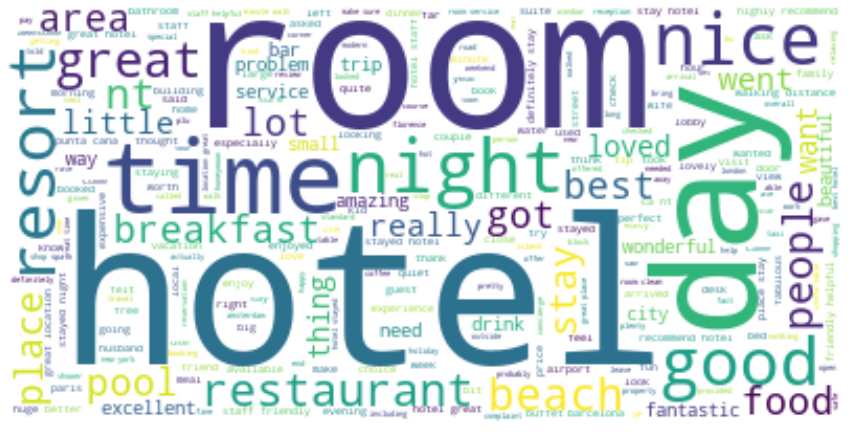

In [ ]:
word_cloud(rating = int(5))

## Lowest rating

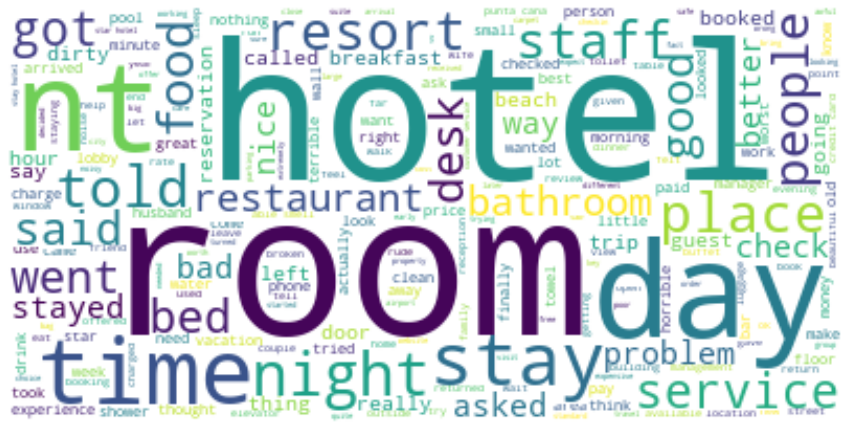

In [ ]:
word_cloud(rating = int(1))